In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [7]:
df_hmeq = pd.read_csv("../data/HMEQ.csv",encoding = 'euc-kr')
df_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [8]:
df_hmeq.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [9]:
df_hmeq['JOB'].fillna("Other",inplace = True)
df_hmeq.fillna(df_hmeq.mean(),inplace = True)


In [10]:
df_hmeq_dummy = pd.get_dummies(df_hmeq)
df_hmeq_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [14]:
np.random.seed(seed = 1234)
x= df_hmeq_dummy.drop("BAD",axis = 1 )
y= df_hmeq_dummy["BAD"]

x_tr,x_test,y_tr,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1234)

print("train data x size : {}".format(x_tr.shape))
print("train data y size : {}".format(y_tr.shape))
print("test data x size : {}".format(x_test.shape))
print("test data y size : {}".format(y_test.shape))

train data x size : (2623, 18)
train data y size : (2623,)
test data x size : (1125, 18)
test data y size : (1125,)


In [18]:
# knn 모델생성
knn_uncustomized = KNeighborsClassifier()


In [40]:
knn_uncustomized.fit(x_tr,y_tr)

y_pred = knn_uncustomized.predict(x_test)
print("predict test set:{}".format(y_pred.tolist()[:20]))
print("test set label:{}".format(y_test.tolist()[:20]))
print("accuracy:{}".format(knn_uncustomized.score(x_test,y_test)))


predict test set:[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
test set label:[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
accuracy:0.9075555555555556


In [22]:
# 최대 이웃수
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)]

train_accuracy = []; test_accuracy = [];

for n_neibors in para_neibor:
    clf = KNeighborsClassifier(n_neighbors=n_neibors)
    clf.fit(x_tr,y_tr)
    train_accuracy.append(clf.score(x_tr,y_tr))
    test_accuracy.append(clf.score(x_test,y_test))
    
df_neibors = pd.DataFrame()
df_neibors["Neighbors"] = para_neibor
df_neibors["TrainAccuracy"] = train_accuracy
df_neibors["TestAccuracy"] = test_accuracy
df_neibors

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000000,0.877333
1,2,0.928326,0.912000
2,3,0.929470,0.912889
3,4,0.916127,0.913778
4,5,0.916127,0.907556
5,6,0.913458,0.911111
6,7,0.913458,0.912000
7,8,0.910027,0.912000
8,9,0.910789,0.912889
9,10,0.908883,0.910222


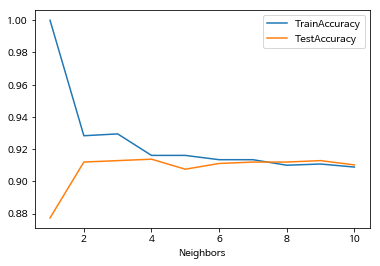

In [24]:
df_neibors.set_index("Neighbors",inplace = False).plot.line()

In [25]:
# 최대 이웃수
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)]*2
# 가중치
para_w = ["uniform"] * max_neibor + ["distance"] * max_neibor

train_accuracy = []; test_accuracy = [];

for (n_neibors,w) in zip(para_neibor,para_w):void dfs(int r, int c) 
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights=w)
    clf.fit(x_tr,y_tr)
    train_accuracy.append(clf.score(x_tr,y_tr))
    test_accuracy.append(clf.score(x_test,y_test))
    
df_neibors_w = pd.DataFrame()
df_neibors_w["Neighbors"] = para_neibor
df_neibors_w["TrainAccuracy"] = train_accuracy
df_neibors_w["TestAccuracy"] = test_accuracy
df_neibors_w["Weights"] = para_w

df_neibors_w

,Neighbors,TrainAccuracy,TestAccuracy,Weights
0,1,1.000000,0.877333,uniform
1,2,0.928326,0.912000,uniform
2,3,0.929470,0.912889,uniform
3,4,0.916127,0.913778,uniform
4,5,0.916127,0.907556,uniform
5,6,0.913458,0.911111,uniform
6,7,0.913458,0.912000,uniform
7,8,0.910027,0.912000,uniform
8,9,0.910789,0.912889,uniform
9,10,0.908883,0.910222,uniform


In [28]:
print(para_w)

['uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'uniform', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance', 'distance']


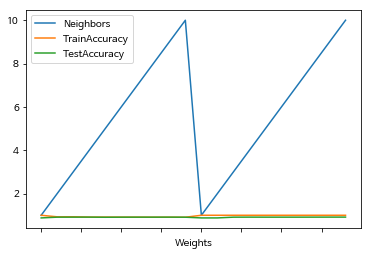

In [26]:
df_neibors_w.set_index('Weights',inplace = False).plot.line()
# 가중치의 방법이 다르므로, melt를 사용하여 그래프로 나타내야한다.

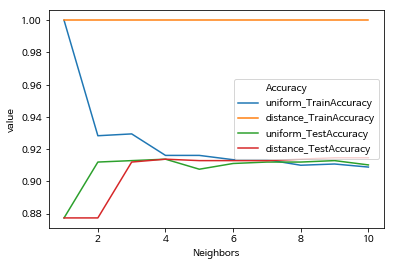

In [27]:
# pivot 의 역 = melt
df_neibors_w_melt = pd.melt(df_neibors_w,id_vars=["Neighbors","Weights"])
df_neibors_w_melt["Accuracy"] = df_neibors_w_melt["Weights"] + "_" + df_neibors_w_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_w_melt )


In [29]:
# 최대 이웃수
# 이웃 수 증가
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)] * 3
#알고리즘
para_al =  ["ball_tree"] * max_neibor + ["kd_tree"] * max_neibor + ["brute"] * max_neibor

train_accuracy = []; test_accuracy = [];

for (n_neibors,algo) in zip(para_neibor,para_al):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,algorithm=algo)
    clf.fit(x_tr,y_tr)
    train_accuracy.append(clf.score(x_tr,y_tr))
    test_accuracy.append(clf.score(x_test,y_test))
    
df_neibors_al = pd.DataFrame()
df_neibors_al["Neighbors"] = para_neibor
df_neibors_al["TrainAccuracy"] = train_accuracy
df_neibors_al["TestAccuracy"] = test_accuracy
df_neibors_al["Algorithm"] = para_al

df_neibors_al

,Neighbors,TrainAccuracy,TestAccuracy,Algorithm
0,1,1.000000,0.877333,ball_tree
1,2,0.928326,0.912000,ball_tree
2,3,0.929470,0.912889,ball_tree
3,4,0.916127,0.913778,ball_tree
4,5,0.916127,0.907556,ball_tree
5,6,0.913458,0.911111,ball_tree
6,7,0.913458,0.912000,ball_tree
7,8,0.910027,0.912000,ball_tree
8,9,0.910789,0.912889,ball_tree
9,10,0.908883,0.910222,ball_tree


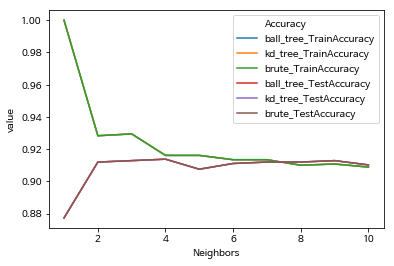

In [30]:
# pivot 의 역 = melt
df_neibors_al_melt = pd.melt(df_neibors_al,id_vars=["Neighbors","Algorithm"])
df_neibors_al_melt["Accuracy"] = df_neibors_al_melt["Algorithm"] + "_" + df_neibors_al_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_al_melt )


In [31]:
# 최대 이웃수
# 이웃 수 증가
# 거리 계산법에 따른 정확도 분석
max_neibor = 10
para_neibor = [i+1 for i in range(max_neibor)] * 3
#거리계산법
para_dis =  ["minkowski"] * max_neibor + ["euclidean"] * max_neibor + ["manhattan"] * max_neibor

train_accuracy = []; test_accuracy = [];

for (n_neibors,dis) in zip(para_neibor,para_dis):
    clf = KNeighborsClassifier(n_neighbors=n_neibors,weights="uniform",algorithm="ball_tree",metric=dis)
    clf.fit(x_tr,y_tr)
    train_accuracy.append(clf.score(x_tr,y_tr))
    test_accuracy.append(clf.score(x_test,y_test))
    
df_neibors_dis = pd.DataFrame()
df_neibors_dis["Neighbors"] = para_neibor
df_neibors_dis["TrainAccuracy"] = train_accuracy
df_neibors_dis["TestAccuracy"] = test_accuracy
df_neibors_dis["Metric"] = para_dis

df_neibors_dis

,Neighbors,TrainAccuracy,TestAccuracy,Metric
0,1,1.000000,0.877333,minkowski
1,2,0.928326,0.912000,minkowski
2,3,0.929470,0.912889,minkowski
3,4,0.916127,0.913778,minkowski
4,5,0.916127,0.907556,minkowski
5,6,0.913458,0.911111,minkowski
6,7,0.913458,0.912000,minkowski
7,8,0.910027,0.912000,minkowski
8,9,0.910789,0.912889,minkowski
9,10,0.908883,0.910222,minkowski


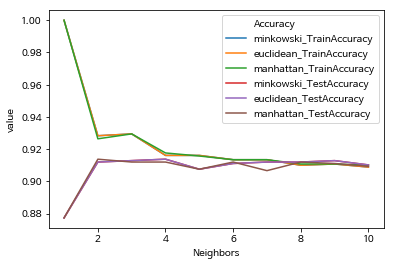

In [32]:
# pivot 의 역 = melt
df_neibors_dis_melt = pd.melt(df_neibors_dis,id_vars=["Neighbors","Metric"])
df_neibors_dis_melt["Accuracy"] = df_neibors_dis_melt["Metric"] + "_" + df_neibors_dis_melt["variable"]

ax = sns.lineplot(x = "Neighbors",y = "value", hue = "Accuracy", data = df_neibors_dis_melt )


In [33]:
#결론 도출
clf_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",algorithm="ball_tree",metric="euclidean")
clf_model.fit(x_tr,y_tr)
print("train data accuracy :{0:.3f}".format(clf_model.score(x_tr,y_tr)))
print("test data accuracy :{0:.3f}".format(clf_model.score(x_test,y_test)))


train data accuracy :0.916
test data accuracy :0.914


<h2>Grid Search CV <h2>

In [42]:
from sklearn.model_selection import GridSearchCV

x = x_tr
y = y_tr

params_grid = {'n_neighbors' : [i+1 for i in range(10)],
              'weights' : ["uniform","distance"],
              'algorithm' : ["ball_tree","kd_tree","brute"],
              'metric':["euclidean","minkowski","manhattan"]}
grid_search = GridSearchCV(knn_uncustomized,param_grid=params_grid)
grid_search.fit(x,y)

print("Best_score : {}".format(grid_search.best_score_))
print("Best_params : {}".format(grid_search.best_params_))


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best_score : 0.9096454441479223
Best_params : {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}


In [46]:
from sklearn.metrics import accuracy_score

clf_best_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",algorithm="ball_tree",metric="manhattan")
clf_best_model.fit(x_test,y_test)
y_pred = clf_best_model.predict(x_test)

print(accuracy_score(y_test,y_pred))


0.9155555555555556
